# The integral TMA4101
> **Tasks from Integral TMA4101**

### Task 1
> **1.**  Plot the function (too complicated) over the histogram of the measured plank data.

In [2]:
# Imports
import numpy as np

# Import data from csv file
with open('kai.csv', 'r') as f:
    data = np.loadtxt(f, delimiter=',')
    
widths = [data[i][1] for i in range(len(data))]

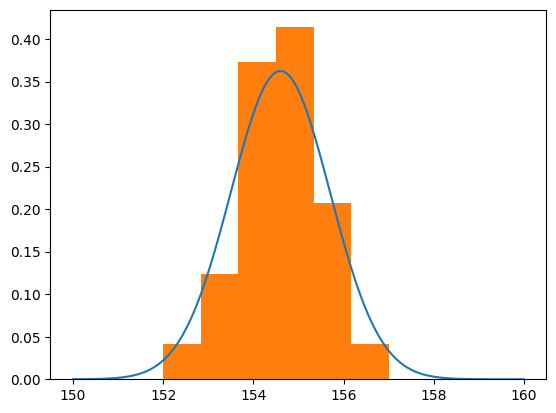

In [3]:
# Define variables and the function
mu = 154.6 # Mean width in mm
sigma = 1.1 # Standard deviation in mm

def f(x):
    """Normal distribution function"""
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))

# Plot the function and histogram of the data
import matplotlib.pyplot as plt

plt.plot(np.linspace(150, 160, 100), f(np.linspace(150, 160, 100)))
plt.hist(widths, bins=6, density=True)
plt.show()


### Task 2
> **2.**  Try to find the area under the normal distribution curve from x = 0 to x = 1.

In [4]:
# Standard normal distribution function
def g(x):
    """Standard normal distribution function"""
    return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)

# Find area under the curve from x = 0 to x = 1
from scipy import integrate

area, error = integrate.quad(g, 0, 1)
print('Area under the curve from x = 0 to x = 1:', area)

Area under the curve from x = 0 to x = 1: 0.3413447460685429


### Task 3 and 6
> **3.**  Try to find the area under the normal distribution curve from x = 0 to x = 1 using Riemann sums.

In [37]:
# Find area under the curve from x = 0 to x = 1 using left Riemann sum
def left_riemann_sum(f, a, b, N):
    """Left Riemann sum"""
    x = np.linspace(a, b, N+1)
    y = f(x[:-1])
    dx = (b-a)/N
    return np.sum(y*dx)

# Find area under the curve from x = 0 to x = 1 using right Riemann sum
def right_riemann_sum(f, a, b, N):
    """Right Riemann sum"""
    x = np.linspace(a, b, N+1)
    y = f(x[1:])
    dx = (b-a)/N
    return np.sum(y*dx)

# Find area under the curve from x = 0 to x = 1 using midpoint Riemann sum
def midpoint_riemann_sum(f, a, b, N):
    """Midpoint Riemann sum"""
    x = np.linspace(a, b, N+1)
    x_mid = (x[:-1] + x[1:])/2
    y = f(x_mid)
    dx = (b-a)/N
    return np.sum(y*dx)

# Find area under the curve from x = 0 to x = 1 using trapezoidal rule
def trapezoidal_rule(f, a, b, N):
    """Trapezoidal rule"""
    x = np.linspace(a, b, N+1)
    y = f(x)
    dx = (b-a)/N
    return dx*(np.sum(y) - 0.5*(y[0] + y[-1]))

N = 100
truth = 0.3413447460685429
print('Area under the curve from x = 0 to x = 1 (Right):', right_riemann_sum(g, 0, 1, N), 'Error:', np.abs(truth - right_riemann_sum(g, 0, 1, N)))
print('Area under the curve from x = 0 to x = 1 (Left):', left_riemann_sum(g, 0, 1, N), 'Error:', np.abs(truth - left_riemann_sum(g, 0, 1, N)))
print('Area under the curve from x = 0 to x = 1 (Midpoint):', midpoint_riemann_sum(g, 0, 1, N), 'Error:', np.abs(truth - midpoint_riemann_sum(g, 0, 1, N)))
print('Area under the curve from x = 0 to x = 1 (Trapezoidal):', trapezoidal_rule(g, 0, 1, N), 'Error:', np.abs(truth - trapezoidal_rule(g, 0, 1, N)))


Area under the curve from x = 0 to x = 1 (Right): 0.34055787185970565 Error: 0.0007868742088372738
Area under the curve from x = 0 to x = 1 (Left): 0.34212758741852856 Error: 0.0007828413499856302
Area under the curve from x = 0 to x = 1 (Midpoint): 0.34134575428577646 Error: 1.0082172335335038e-06
Area under the curve from x = 0 to x = 1 (Trapezoidal): 0.3413427296391171 Error: 2.0164294258218085e-06


Here we can see that the Riemann sum is a good starting point as it is simple to implement and gives a good approximation of the area under the curve. However, it is not very accurate and we can see that the error is quite large, especially when we use a small number of rectangles.

<p></p>

As seen in the results, the midpoint gives the best approximation of the integral because both left and right Riemann sums are approximating the area under the curve with rectangles that are either too small or too large. The midpoint is a good compromise between the two.

<p></p>

The trapezoidal rule is also way better than left and right, but slightly worse than the midpoint. The Error of trapezoidal rule is approximately 0.000002 (N=100), compared to midpoint which is 0.000001 (N=100). 

### Task 8
> **8.** Find an approximation for $ \int_{0}^{\pi} \text{sinc}(x) \, dx \approx 1.85193705196 $ using both Riemann sums and the trapezoidal method. Compare the accuracy of the methods when using the same $ h $.


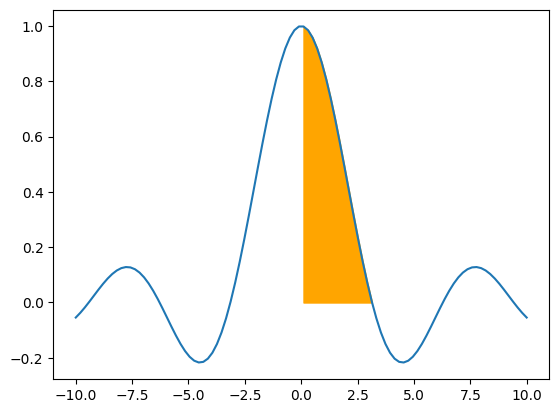

In [47]:
#Define new sinc function that handles singularity at x=0
def sinc(x):
    """Sinc function"""
    result = np.where(x == 0, 1, np.sin(x) / x)
    return result

# Visualize sinc function with area under the curve from x = 0 to x = pi
x = np.linspace(-10, 10, 100)
plt.fill_between(x, sinc(x), where=(x >= 0) & (x <= np.pi), color='orange')
plt.plot(x, sinc(x))
plt.show()

In [48]:
# Find the area under the sinc curve from x = 0 to x = pi using riemann sum
N = 100
truth = 1.851937051982466
print('Area under the curve from x = 0 to x = pi (Right):', right_riemann_sum(sinc, 0, np.pi, N), 'Error:', np.abs(truth - right_riemann_sum(sinc, 0, np.pi, N)))
print('Area under the curve from x = 0 to x = pi (Left):', left_riemann_sum(sinc, 0, np.pi, N), 'Error:', np.abs(truth - left_riemann_sum(sinc, 0, np.pi, N)))
print('Area under the curve from x = 0 to x = pi (Midpoint):', midpoint_riemann_sum(sinc, 0, np.pi, N), 'Error:', np.abs(truth - midpoint_riemann_sum(sinc, 0, np.pi, N)))
print('Area under the curve from x = 0 to x = pi (Trapezoidal):', trapezoidal_rule(sinc, 0, np.pi, N), 'Error:', np.abs(truth - trapezoidal_rule(sinc, 0, np.pi, N)))


Area under the curve from x = 0 to x = pi (Right): 1.8362029086068918 Error: 0.015734143375574217
Area under the curve from x = 0 to x = pi (Left): 1.8676188351427898 Error: 0.01568178316032376
Area under the curve from x = 0 to x = pi (Midpoint): 1.8519501420995959 Error: 1.3090117129799239e-05
Area under the curve from x = 0 to x = pi (Trapezoidal): 1.851910871874841 Error: 2.61801076251178e-05


/var/folders/3v/6dz70lt14pgbfvjsn53t8kdr0000gn/T/ipykernel_42275/1826433630.py:4: RuntimeWarning: invalid value encountered in divide
  result = np.where(x == 0, 1, np.sin(x) / x)
